# Details on the spectral_density module

**For a description on how to use the most important functionality, please checkout the tutorials and the API documentation.**

The following example code shows how to use most of the functionality of the `tempo.spectral_density` module. This code is *suplementary* to the documentation and also includes functionality that is only relevant to the inner workings of the TimeEvolvingMPO package. Sections that show example code that is not part of the API is marked with three asterix `***`.

**Contents:**

* A: CustomFunctionSD class
    * A1: spectral_density()
    * A2: correlation()
    * A3: correlation_2d_integral() ***
* B: StandardSD class
    * B1: spectral_density()
    * B2: correlation()
    * B3: correlation_2d_integral() ***
        

In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time_evolving_mpo as tempo

## A: CustomFunctionSD class

In [2]:
j_function_A = lambda w: 0.1 * w**2
sd_A = tempo.CustomFunctionSD(j_function_A, cutoff=4.0, cutoff_type="exponential")

In [3]:
print(sd_A)

----------------------------------------------
CustomFunctionSD object: __unnamed__
 __no_description__
  cutoff        = 4.0 
  cutoff_type   = exponential 



In [4]:
sd_A.cutoff

4.0

In [5]:
sd_A.cutoff_type

'exponential'

### A1: spectral_density()

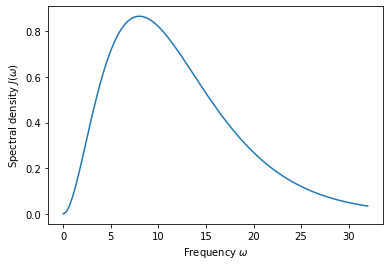

In [6]:
w_A1 = np.linspace(0, 8.0*sd_A.cutoff, 100)
y_A1 = sd_A.spectral_density(w_A1)
# -- plot --
plt.xlabel(r"Frequency $\omega$")
plt.ylabel(r"Spectral density $J(\omega)$")
plt.plot(w_A1,y_A1)

### A2: correlation()

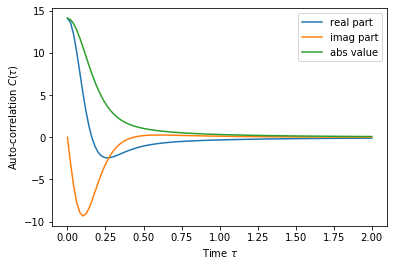

In [7]:
t_A2 = np.linspace(0, 8.0/sd_A.cutoff, 100)
y_A2 = [sd_A.correlation(tt,temperature=2.0) for tt in t_A2]
# -- plot --
plt.xlabel(r"Time $\tau$")
plt.ylabel(r"Auto-correlation $C(\tau)$")
plt.plot(t_A2,np.real(y_A2), label="real part")
plt.plot(t_A2,np.imag(y_A2), label="imag part")
plt.plot(t_A2,np.abs(y_A2), label="abs value")
plt.legend()

### A3: correlation_2d_integral() ***

In [8]:
square_A3 = sd_A.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="square")
square_A3

(-0.0058844040175371195-0.008156737305077964j)

In [9]:
upper_A3 = sd_A.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="upper-triangle")
upper_A3

(-0.0030281875684875564-0.003278688524590163j)

In [10]:
lower_A3 = sd_A.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="lower-triangle")
lower_A3

(-0.0028562164490494053-0.004878048780487796j)

In [11]:
square_A3 - upper_A3 - lower_A3 # should be close to zero

(-1.5785983631388945e-16-4.336808689942018e-18j)

## B: StandardSD class

In [12]:
sd_B = tempo.StandardSD(alpha=0.2, zeta=2.0, cutoff=4.0, cutoff_type="exponential")

In [13]:
print(sd_B)

----------------------------------------------
StandardSD object: __unnamed__
 __no_description__
  cutoff        = 4.0 
  cutoff_type   = exponential 
  alpha         = 0.2 
  zeta          = 2.0 



In [14]:
sd_B.alpha

0.2

In [15]:
sd_B.zeta

2.0

In [16]:
sd_B.cutoff

4.0

In [17]:
sd_B.cutoff_type

'exponential'

### B1: spectral_density()

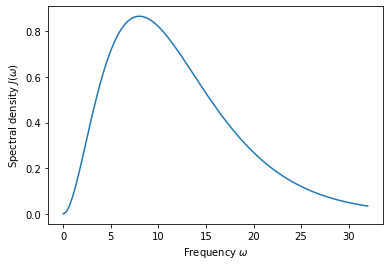

In [18]:
w_B1 = np.linspace(0, 8.0*sd_B.cutoff, 100)
y_B1 = sd_A.spectral_density(w_B1)
# -- plot --
plt.xlabel(r"Frequency $\omega$")
plt.ylabel(r"Spectral density $J(\omega)$")
plt.plot(w_B1,y_B1)

### B2: correlation()

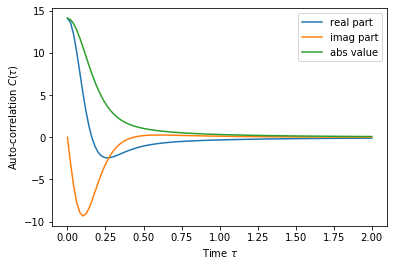

In [19]:
t_B2 = np.linspace(0, 8.0/sd_B.cutoff, 100)
y_B2 = [sd_A.correlation(tt,temperature=2.0) for tt in t_B2]
# -- plot --
plt.xlabel(r"Time $\tau$")
plt.ylabel(r"Auto-correlation $C(\tau)$")
plt.plot(t_B2,np.real(y_B2), label="real part")
plt.plot(t_B2,np.imag(y_B2), label="imag part")
plt.plot(t_B2,np.abs(y_B2), label="abs value")
plt.legend()

### B3: correlation_2d_integral() ***

In [20]:
square_B3 = sd_B.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="square")
square_B3

(-0.0058844040175371195-0.008156737305077964j)

In [21]:
upper_B3 = sd_B.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="upper-triangle")
upper_B3

(-0.0030281875684875564-0.003278688524590163j)

In [22]:
lower_B3 = sd_B.correlation_2d_integral(time_1=0.25, delta=0.05, temperature=2.0, shape="lower-triangle")
lower_B3

(-0.0028562164490494053-0.004878048780487796j)

In [23]:
square_B3 - upper_B3 - lower_B3 # should be close to zero

(-1.5785983631388945e-16-4.336808689942018e-18j)